Marc Riley
DSC 680
Credit Card Fraud Detection

In [ ]:
# import libraries used for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

In [14]:
%config Completer.use_jedi = False

In [2]:
# Load Data
df = pd.read_csv('creditcard.csv')

In [3]:
#examine the data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599

In [5]:
# find missing values
for c in df.columns:
    miss = df[c].isnull().sum()
    if miss >0:
        print("{} has {} missing values".format(c,miss))
    else:
        print("{} column has no missing values!".format(c))

Time column has no missing values!
V1 column has no missing values!
V2 column has no missing values!
V3 column has no missing values!
V4 column has no missing values!
V5 column has no missing values!
V6 column has no missing values!
V7 column has no missing values!
V8 column has no missing values!
V9 column has no missing values!
V10 column has no missing values!
V11 column has no missing values!
V12 column has no missing values!
V13 column has no missing values!
V14 column has no missing values!
V15 column has no missing values!
V16 column has no missing values!
V17 column has no missing values!
V18 column has no missing values!
V19 column has no missing values!
V20 column has no missing values!
V21 column has no missing values!
V22 column has no missing values!
V23 column has no missing values!
V24 column has no missing values!
V25 column has no missing values!
V26 column has no missing values!
V27 column has no missing values!
V28 column has no missing values!
Amount column has no m

<AxesSubplot:>

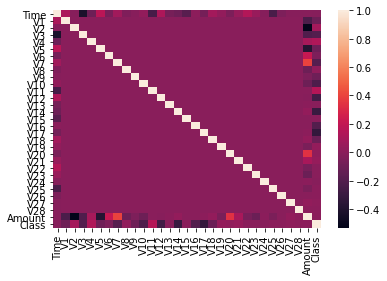

In [6]:
#Correlation test
corr = df.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values)

In [7]:
#find how many actve fraud classes are in the data 
Fraud = df[df["Class"] == 1]
Normal = df[df["Class"] == 0]
print(Fraud.shape)
print(Normal.shape)
#very unbalanced data

(492, 31)
(284315, 31)


In [8]:
#find duplicates
df.duplicated().sum()

1081

In [9]:
#drop duplicates
df.drop_duplicates(inplace = True)

In [10]:
#decided to leave duplicates in due to the fact they seem to be tied to fraud
Fraud = df[df["Class"] == 1]
Normal = df[df["Class"] == 0]
print(Fraud.shape)
print(Normal.shape)

(473, 31)
(283253, 31)


C:\Users\Daffy\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Daffy\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Daffy\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

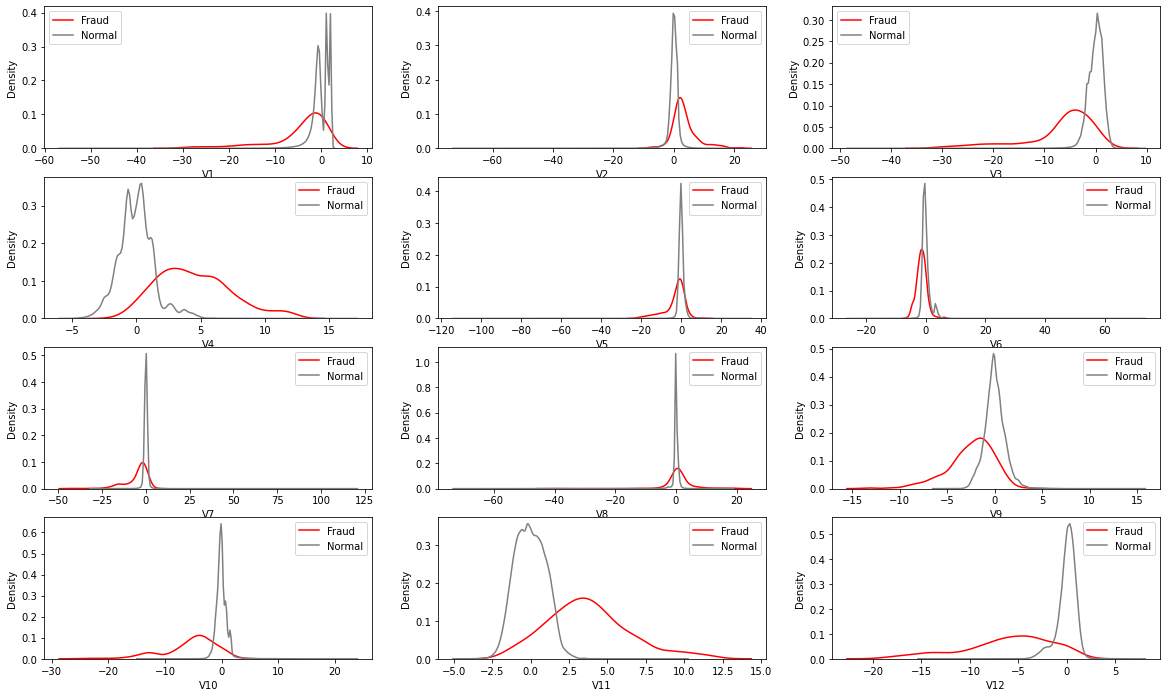

In [16]:
plt.figure(figsize = (20,12))
j=1;
for i in range(1,13):
    plt.subplot(4,3,j)
    sns.distplot(Fraud["V"+str(i)],hist = False,color = 'red',label = "Fraud")
    sns.distplot(Normal["V"+str(i)],hist = False, color = 'gray',label = "Normal")
    plt.legend(fontsize = "medium",loc = "best")
    j = j+1    

In [11]:
#split the target varibale and create x y
X = df.drop("Class",axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y,random_state=142)

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#gradient boosting 

xgb = GradientBoostingClassifier(
    max_features='auto',
    min_samples_leaf=1,
    n_estimators=400,
    learning_rate=0.5,
    max_depth=5,
    random_state=1,
    )
xgb.fit(X_train,y_train)

In [ ]:
predictxgb = xgb.predict(X_test)
print(classification_report(predictxgb,y_test))

In [ ]:
#Over_Sampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=142)

X_os, y_os = smote.fit_resample(X_train, y_train)

In [ ]:
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_os, y_os, test_size=0.2, stratify = y_os,random_state=142)

In [ ]:
xgbus = GradientBoostingClassifier(
    max_features='auto',
    min_samples_leaf=1,
    n_estimators=500,
    learning_rate=0.5,
    max_depth=5,
    random_state=3,
    )
xgbus.fit(X_train_us,y_train_us)

In [ ]:
predictxgbos = xgbus.predict(X_test_os)
print(classification_report(predictxgbos,y_test_os))